# Introduction to Numpy

Numpy is a matrix/linear algebra library for Python. In _core_ Python (Python without external libraries), working with collection of numbers requires the use of loops, list comprehensions or map/filter/reduce functions. However, in Numpy, collections of numbers are the default and easy to work with.

Extremely helpful cheatsheet on numpy: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf (check the web, there are many more)

Let's take a look at some examples

In [1]:
import numpy as np # <= "np" is the standard abbreviation for numpy
import matplotlib.pyplot as plt # <= needed to import images as numpy matrices and display matrices as images
from PIL import Image # Another library for reading images

import os
import sys

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path: sys.path.append(module_path)

from src import utils

In [4]:
%matplotlib inline
#plt.figure(figsize=(50,50))
np.random.seed(seed=42)

In [5]:
%reload_ext post_content
%post_content register YOUR_USER_NAME

PostContent loaded
Registered


In [6]:
a = np.array([1,2,3,4,5,6,7,8,9])
a

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
b = np.array([9,8,7,6,5,4,3,2,1])
b

array([9, 8, 7, 6, 5, 4, 3, 2, 1])

In [8]:
a + b

array([10, 10, 10, 10, 10, 10, 10, 10, 10])

In [9]:
a - b

array([-8, -6, -4, -2,  0,  2,  4,  6,  8])

In [10]:
b - a

array([ 8,  6,  4,  2,  0, -2, -4, -6, -8])

In [11]:
a * b

array([ 9, 16, 21, 24, 25, 24, 21, 16,  9])

Notice that we are able to add the whole array, just by using normal arithmetic functions. No need to use loops!

Recall that attempting to add two Python lists just concatenates them:

In [12]:
[1,2,3] + [4,5,6]

[1, 2, 3, 4, 5, 6]

### Numerical programming in Python

In the early 90s, some programmers wanted to use Python for their scientific work, but couldn't do so for several reasons:
1. Python is extremely slow[1], compared to faster languages. Numpy mitigates this problem by compiling important code in C, but exposing a Python API
2. Numeric code, which can consist of multi-dimensional matrices, had no counterpart in Python. As we have seen above, Numpy can handle an array of numbers just fine (later we will see examples of multiple dimensions)
3. Python, at the time, had no collection of high quality functions to operate on arrays or matrices of numbers. Numpy is that collection of numbers.


[1] https://benchmarksgame-team.pages.debian.net/benchmarksgame/performance/nbody.html


#### Quick performance comparison between core Python and numpy

In [13]:
core_python = list(range(10_000))
numpy_python = np.arange(10_000)

In [14]:
%timeit sum(core_python)
%timeit np.sum(numpy_python)

85.6 µs ± 2.19 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
8.52 µs ± 115 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Numpy is an _order of magnitude_ faster than core Python!

Modern GPUs make this _even_ faster (ask me about them)

### Multi-dimensional arrays (matrics and tensors)

Earlier we saw some examples of arrays. Numpy can just as easily create 2, 3 or any dimensional arrays:

In [15]:
np.array([1,2,3,4,5,6,7,8,9]).shape

(9,)

In [16]:
np.array([[1,2,3], [4,5,6]])

array([[1, 2, 3],
       [4, 5, 6]])

In [17]:
np.array([[1,2,3], [4,5,6]]).shape

(2, 3)

In [19]:
# Generate a 2-dimensional matrix (5 rows by 3 columns) of random numbers
a2d = np.random.random((5,3))
a2d

array([[0.18340451, 0.30424224, 0.52475643],
       [0.43194502, 0.29122914, 0.61185289],
       [0.13949386, 0.29214465, 0.36636184],
       [0.45606998, 0.78517596, 0.19967378],
       [0.51423444, 0.59241457, 0.04645041]])

In [20]:
b2d = np.random.random((5,3))
b2d

array([[0.60754485, 0.17052412, 0.06505159],
       [0.94888554, 0.96563203, 0.80839735],
       [0.30461377, 0.09767211, 0.68423303],
       [0.44015249, 0.12203823, 0.49517691],
       [0.03438852, 0.9093204 , 0.25877998]])

In [21]:
a2d + b2d

array([[0.79094936, 0.47476637, 0.58980802],
       [1.38083056, 1.25686117, 1.42025024],
       [0.44410763, 0.38981676, 1.05059487],
       [0.89622248, 0.9072142 , 0.69485069],
       [0.54862296, 1.50173497, 0.30523039]])

### Selecting rows and columns

#### Slicing
Selecting subsets of a numpy array or matrix should look somewhat familiar from similar exercises done while studying lists and strings.

Select the first row from array `a2d`

In [22]:
a2d[0, :]

array([0.18340451, 0.30424224, 0.52475643])

Select the second column from array `a2d`

In [32]:
a2d[:, 1]

array([0.32354162, 0.05084565, 0.15017489, 0.92551425, 0.35695441])

**Exercise** Given the following matrix, select the bottom right corner (the resulting matrix should have 4 values) - hint: recall that we can use negative numbers to access items from the end

In [25]:
exercise1 = np.array([[1,2,3],[4,5,6], [7,8,9]])
exercise1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [33]:
%%post_content exercise_045_a

#type your answer here

array([[5, 6],
       [8, 9]])

#### Boolean Indexing
Values can also be selected using boolean operators (somewhat like SQL's where clause).

In the example blow, we generate an array of 10 values, then extract all values above 0.5:

In [39]:
ten_vals = np.random.random((10,))
ten_vals

array([0.66252228, 0.31171108, 0.52006802, 0.54671028, 0.18485446,
       0.96958463, 0.77513282, 0.93949894, 0.89482735, 0.59789998])

In [40]:
ten_vals[ten_vals > .5]

array([0.66252228, 0.52006802, 0.54671028, 0.96958463, 0.77513282,
       0.93949894, 0.89482735, 0.59789998])

Notice that we actually did two steps above. First, check each item to see if it is greater than 0.5:

In [41]:
mask = ten_vals > 0.5
mask

array([ True, False,  True,  True, False,  True,  True,  True,  True,
        True])

We then passed in this _mask_ to our array:

In [42]:
ten_vals[mask]

array([0.66252228, 0.52006802, 0.54671028, 0.96958463, 0.77513282,
       0.93949894, 0.89482735, 0.59789998])

If the mask contains several sub-expressions, such as 'condition A AND condition B', then each expression needs to be wrapped in a bracket and expressions need to be combined with `&` for 'and' and `|` for 'or'

In [53]:
ten_vals[(ten_vals > .1) & (ten_vals < .9)]

array([0.66252228, 0.31171108, 0.52006802, 0.54671028, 0.18485446,
       0.77513282, 0.89482735, 0.59789998])

In [54]:
ten_vals[(ten_vals < .1) | (ten_vals > .9)]

array([0.96958463, 0.93949894])

**Exercise** Generate a random array of size 25

In [ ]:
%%post_content exercise_045_b

#type your answer here

**Exercise** From the above array, find all values less than 0.5 _and_ greater than .1

In [ ]:
%%post_content exercise_045_c

#type your answer here

### Columns of data as a matrix

Take a look at the table of numbers below:

In [51]:
grades = np.array([[72, 89, 14],
 [43, 65, 74],
 [38, 71, 62],
 [82, 66, 49],
 [31, 95, 65],
 [42, 58, 51],
 [15, 54, 85],
 [60, 21, 15],
 [79, 23, 58],
 [63, 87, 67]])
grades

array([[72, 89, 14],
       [43, 65, 74],
       [38, 71, 62],
       [82, 66, 49],
       [31, 95, 65],
       [42, 58, 51],
       [15, 54, 85],
       [60, 21, 15],
       [79, 23, 58],
       [63, 87, 67]])

These numbers represent grades of 10 students (each is out of a hundred). The first two are assignments and the last is the final exam.

**Exercise** Show all grades for the first assignment (use the slicing syntax we have used often)

In [ ]:
%%post_content exercise_045_d

#type your answer here

### Dot product

What is the final grade is only the first assignment is considered?

In [63]:
np.dot(grades, [1, 0, 0])

array([72, 43, 38, 82, 31, 42, 15, 60, 79, 63])

Notice that this is the same as using slicing syntax to get the first row. Using the dot product, we are saying, _get 100% of the first column and zero percent of the second and third column_

What is the final grade is assignments 1 and 2 are considired equally and the final exam is ignored (so the first column contributes half and the second column contributes half)?

In [64]:
np.dot(grades, [.5, .5, 0])

array([80.5, 54. , 54.5, 74. , 63. , 50. , 34.5, 40.5, 51. , 75. ])

The following array represents the final grade for each student (think of this as a vertical array, with 47.25 at the top and 71 at the bottom, might make it easier to visualize)

In [58]:
final_grade = np.array([47.25, 64., 58.25, 61.5, 64., 50.5, 59.75, 27.75, 54.5 ,71.])
final_grade

array([47.25, 64.  , 58.25, 61.5 , 64.  , 50.5 , 59.75, 27.75, 54.5 ,
       71.  ])

What if you are the professor and already know the final grade for each student (from a previous quarter), but have forgotton how you weighed the assignments and the final grade? How can you figure out the parameters for the dot product function?

In [68]:
np.linalg.lstsq(grades, final_grade, rcond=None)[0]

array([0.25, 0.25, 0.5 ])

The above method tells us that the first two assignments contributed 25% to the final grade and the last value contributed 50%!

### A picture as a matrix
A black and white image is essentailly a matrix. Each pixel corresponds to a cell in a matrix and the value in that cell corresponds to how dark or light the pixel is.

Color images can be broken down into red, blue and green matrices (so a 3-dimensional matrix), but we'll hold off on such matrices for now.

In [19]:
image = plt.imread("images/chicago.png")

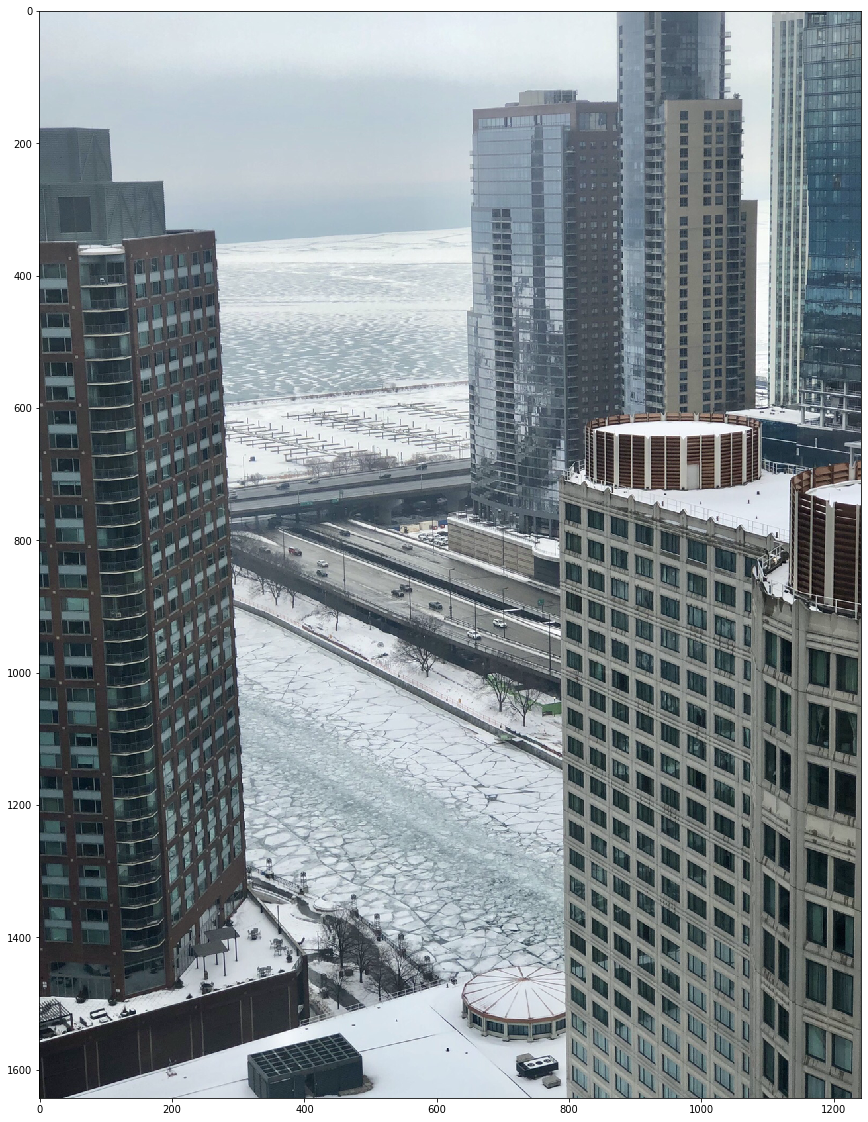

In [20]:
plt.figure(figsize=(20,20))
plt.imshow(image)

In [21]:
image.shape

(1643, 1242, 3)

Confession: the red, green and blue images below are a bit fake. Once we extract a single color channel, matplotlib just sees it as a grascale image. We have to force it to display that image in the color we want.

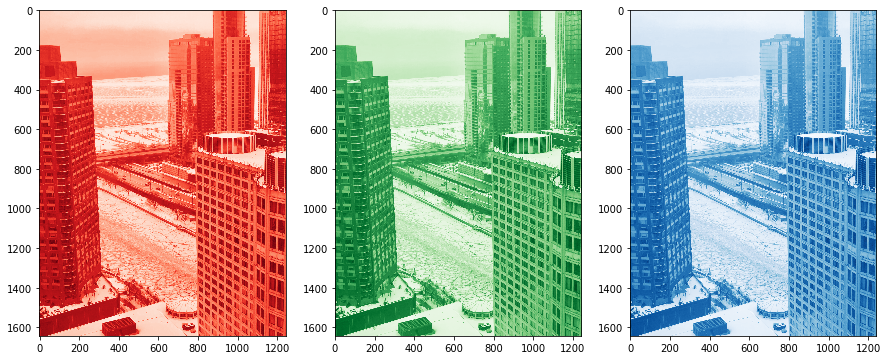

In [22]:
fix, axes = plt.subplots(1,3, figsize=(15,13))

axes[0].imshow(image[:, :, 0], cmap="Reds_r")
axes[1].imshow(image[:, :, 1], cmap="Greens_r")
axes[2].imshow(image[:, :, 2], cmap="Blues_r")

In [23]:
image

array([[[0.827451  , 0.87058824, 0.9019608 ],
        [0.827451  , 0.87058824, 0.9019608 ],
        [0.827451  , 0.87058824, 0.9019608 ],
        ...,
        [0.40784314, 0.49411765, 0.53333336],
        [0.4       , 0.48235294, 0.5411765 ],
        [0.39215687, 0.4745098 , 0.53333336]],

       [[0.8235294 , 0.8666667 , 0.8980392 ],
        [0.827451  , 0.87058824, 0.9019608 ],
        [0.827451  , 0.87058824, 0.9019608 ],
        ...,
        [0.42745098, 0.5137255 , 0.5568628 ],
        [0.4117647 , 0.49411765, 0.5529412 ],
        [0.3882353 , 0.47058824, 0.5294118 ]],

       [[0.827451  , 0.87058824, 0.9019608 ],
        [0.827451  , 0.87058824, 0.9019608 ],
        [0.827451  , 0.87058824, 0.9019608 ],
        ...,
        [0.4392157 , 0.5254902 , 0.5764706 ],
        [0.43529412, 0.5176471 , 0.5764706 ],
        [0.39215687, 0.4745098 , 0.53333336]],

       ...,

       [[0.18039216, 0.19607843, 0.19607843],
        [0.09411765, 0.10980392, 0.10980392],
        [0.09411765, 0

According to [Wikipedia](https://en.wikipedia.org/wiki/Grayscale), a standard ratio to convert color images to black & white is:

$Y'=0.299R'+0.587G'+0.114B'$

In [24]:
chicagobw = np.dot(image, [0.299, 0.587, 0.114])

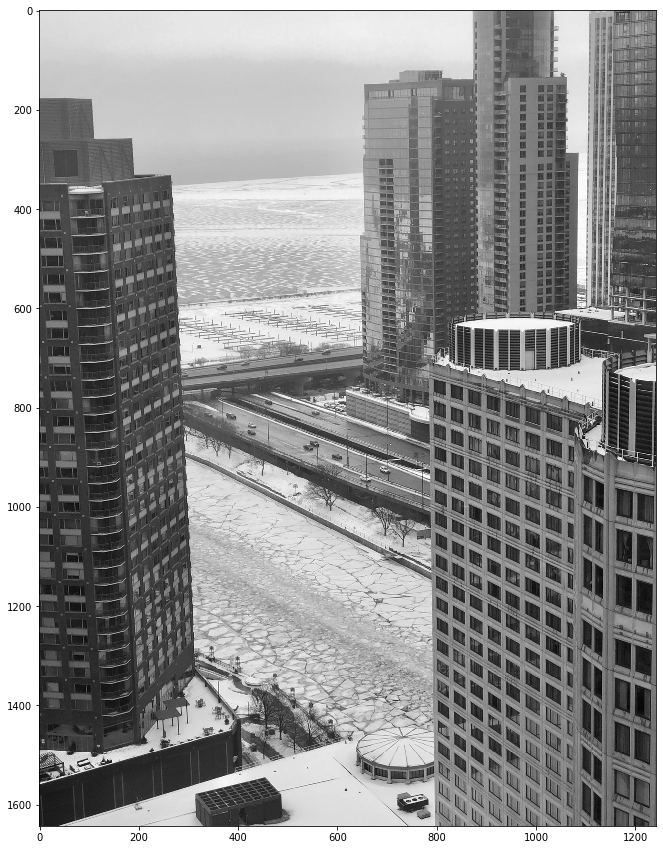

In [25]:
plt.figure(figsize=(15,15))
plt.imshow(chicagobw, cmap="gray")

In [26]:
chicagobw.shape

(1643, 1242)

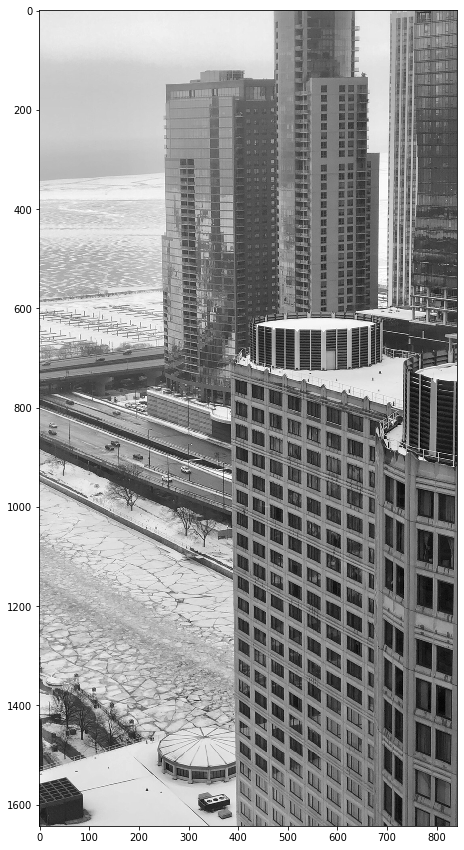

In [27]:
#### Get rid of the building on the left (it looks slanted!!)

plt.figure(figsize=(15,15))
plt.imshow(chicagobw[:, 400:], cmap="gray")

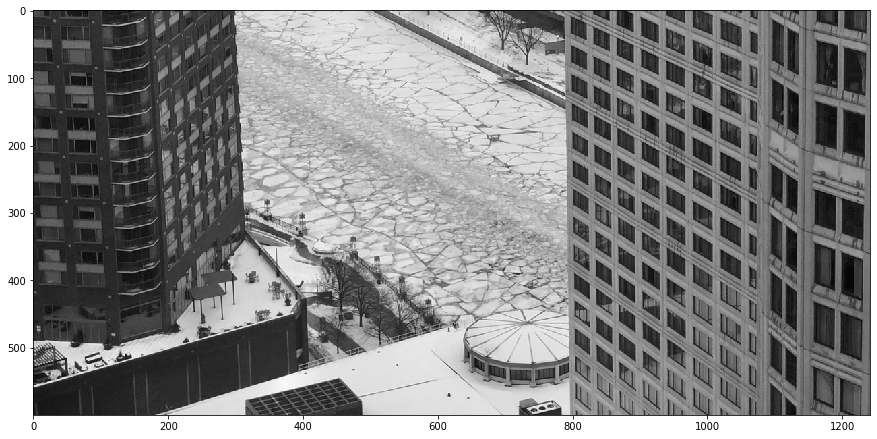

In [28]:
#### Forget the buildings, zoom in on the cracked ice, say height 1000-1600

plt.figure(figsize=(15,15))
plt.imshow(chicagobw[1000:1600, :], cmap="gray")

**Exercise** Where is the _origin_ (0,0), lower left corner, upper left corner, lower right corner, upper right corner or the middle of the image?

**Exercise** Zoom in to the pair of awnings between x-axis 200 and 400 and y-axis 400.

In [ ]:
%%post_content exercise_045_e

#type your answer here

**Exercise** Zoom in to the circular structure between x-axis 600-800 and y-axis 500.


In [ ]:
%%post_content exercise_045_f

#type your answer here

**Exercise** See if you professor will let you use Numpy in your linear algebra class